# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
import requests
import pickle
url = 'https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'
response = requests.get(url)
with open('page_html.pkl', 'wb') as file:
        pickle.dump(response.text, file)

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [ ]:
from bs4 import BeautifulSoup

with open('page_html.pkl', 'rb') as file:
    html_content = pickle.load(file)
soup = BeautifulSoup(html_content, 'html.parser')
page_text = soup.get_text()
print(page_text)

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [13]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

doc = nlp(page_text)

# Filter out stopwords, punctuation, and whitespace, and convert to lower case
filtered_tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of tokens
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
common_tokens = token_counts.most_common(5)

# Print the common tokens with their frequencies
print("Most frequent tokens:")
for token, freq in common_tokens:
    print(f"Token: {token}, Freq: {freq}")

Most frequent tokens:
Token: comment, Freq: 136
Token: march, Freq: 133
Token: 2021, Freq: 133
Token: says, Freq: 132
Token: report, Freq: 130


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [15]:
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]#filters each token to ensure not a space or punctuation
# Count the frequency of lemmas
lemma_counts = Counter(filtered_lemmas)
# Get the 5 most common lemmas
common_lemmas = lemma_counts.most_common(5)

# Print the common lemmas with their frequencies
print("Most frequent lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most frequent lemmas:
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [20]:
interesting = ['hello','world']
sent = 'Hello World!'

def score_sentence_by_token(sentence, tokens):
    doc = nlp(sentence)
    interesting_count = sum(1 for token in doc if token.text.lower() in tokens)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    return interesting_count / total_words if total_words > 0 else 0

print(score_sentence_by_token(sent,interesting))


def score_sentence_by_lemma(sentence, lemmas):
    doc = nlp(sentence)
    interesting_lemma_count = sum(1 for token in doc if token.lemma_.lower() in lemmas)
    total_words = len([token for token in doc if not token.is_punct and not token.is_space])
    return interesting_lemma_count / total_words if total_words > 0 else 0

print(score_sentence_by_lemma(sent,interesting))

1.0
1.0


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

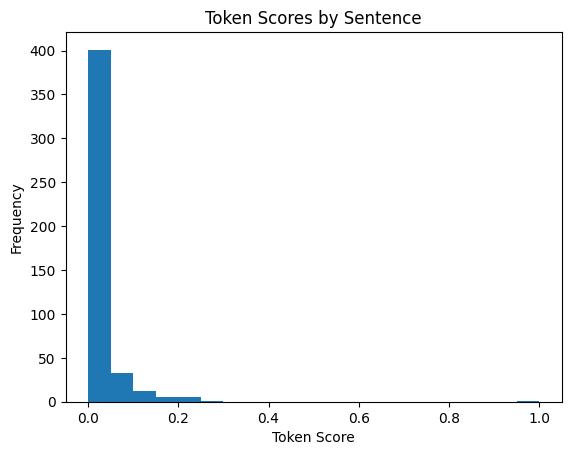

In [ ]:
import matplotlib.pyplot as plt

interesting_tokens = ['how','laser','headlights','work']

# Split the page text into sentences using spaCy
doc = nlp(page_text)
sentences = list(doc.sents)

scores = [score_sentence_by_token(str(sentence), interesting_tokens) for sentence in sentences]

# Plot a histogram of the scores
plt.hist(scores, bins=20)
plt.title('Token Scores by Sentence')
plt.xlabel('Token Score')
plt.ylabel('Frequency')

plt.show()

#0.0 Seems to be the most common, meaning most sentences have no interesting tokens.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

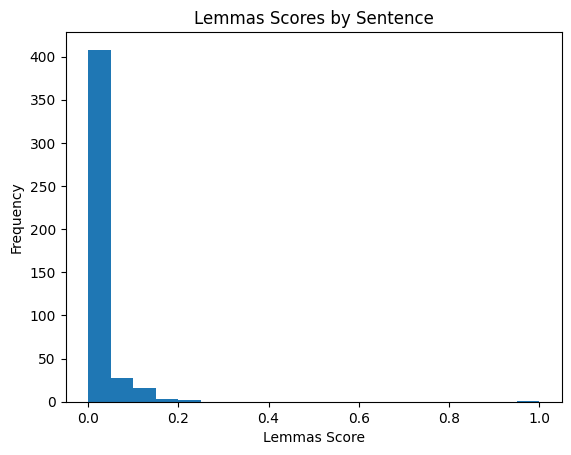

In [27]:
interesting_lemmas = ['how','laser','headlights','work']

scores = [score_sentence_by_lemma(str(sentence), interesting_lemmas) for sentence in sentences]

# Plot a histogram of the scores
plt.hist(scores, bins=20)
plt.title('Lemmas Scores by Sentence')
plt.xlabel('Lemmas Score')
plt.ylabel('Frequency')

plt.show()

#0.0 Seems to be the most common, meaning most sentences have no interesting tokens.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).